------
### Metis: Project McNulty 
>  Neha Gupta                
>  Date: 2/13/2019
-------

### Import Libraries

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from rfpimp import *
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
feature_of_all_train_df_clean = pd.read_csv('../DataSet/feature_of_all_train_df_clean.csv')
X = feature_of_all_train_df_clean.iloc[:, 2:-1]
y = feature_of_all_train_df_clean.outcome

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X
# X_train.shape

# X_test.shape

# y_train.shape

# y_test.shape

,bid_count,country_count,ip_count,average_distinct_country_per_auction,average_distinct_dev_per_auction,average_distinct_merc_per_auction,average_bids_per_auction,num_auction,num_auction_won,percentage_win,avg_bids_auction,competitors
0,73,20,59,1.023,1.432,1.0,1.659,44,0,0.000000,0.000208,205.159091
1,27,7,24,1.778,1.556,1.0,3.000,9,0,0.000000,0.000039,463.666667
2,3,2,3,1.000,1.000,1.0,1.500,2,0,0.000000,0.000077,380.000000
3,2,2,2,1.000,1.000,1.0,1.000,2,0,0.000000,0.000101,92.000000
4,183,2,2,1.000,1.063,1.0,11.438,16,4,0.250000,0.015079,81.000000
5,5329,29,2982,1.482,9.325,1.0,46.746,114,19,0.166667,0.016592,67.394737
6,1,1,1,1.000,1.000,1.0,1.000,1,0,0.000000,0.000113,203.000000
7,1,1,1,1.000,1.000,1.0,1.000,1,0,0.000000,0.000492,153.000000
8,25,5,11,1.000,1.400,1.0,1.667,15,0,0.000000,0.000686,135.466667
9,1,1,1,1.000,1.000,1.0,1.000,1,0,0.000000,0.000248,228.000000


In [18]:
SMOTE_X_resampled, SMOTE_y_resampled  = SMOTE(random_state=30).fit_sample(X, y)
Counter(SMOTE_y_resampled)

Counter({0.0: 1881, 1.0: 1881})

In [19]:
SMOTE_X_train, SMOTE_X_test, SMOTE_y_train, SMOTE_y_test = train_test_split(SMOTE_X_resampled,SMOTE_y_resampled,test_size = 0.3,random_state=42)

In [20]:
ADASYN_X_resampled, ADASYN_y_resampled= ADASYN(random_state=30).fit_sample(X, y)
Counter(ADASYN_y_resampled)

Counter({0.0: 1881, 1.0: 1879})

In [21]:
ADASYN_X_train, ADASYN_X_test, ADASYN_y_train, ADASYN_y_test = train_test_split(ADASYN_X_resampled,ADASYN_y_resampled,test_size = 0.3, random_state=42)

## Logistic Regression

__Logistic Regression with SMOTE__

In [22]:
LogReg_SMOTE = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg_SMOTE.fit(SMOTE_X_train, SMOTE_y_train)


y_pred_SMOTE = LogReg_SMOTE.predict(SMOTE_X_test)

print(metrics.f1_score(SMOTE_y_test, y_pred_SMOTE, average='weighted'))

0.7880005654639636


__Logistic Regression with ADASYN__

In [23]:
LogReg_ADASYN = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg_ADASYN.fit(ADASYN_X_train, ADASYN_y_train)

y_pred_ADASYN = LogReg_ADASYN.predict(ADASYN_X_test)

print(metrics.f1_score(ADASYN_y_test, y_pred_ADASYN, average='weighted'))

0.7650779796664828


# KNN Model

__KNN with SMOTE__

Text(0, 0.5, 'Cross-Validated f1 Score')

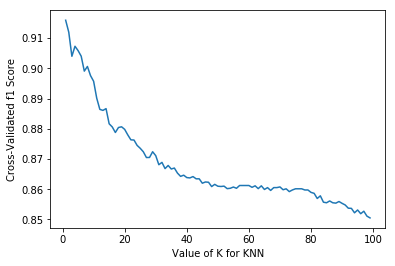

In [24]:
k_range = list(range(1, 100))
k_scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, SMOTE_X_train, SMOTE_y_train, cv=10, scoring='f1')
  k_scores[k] = scores.mean()

plt.plot(k_range, k_scores.values())
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1 Score')

In [25]:
best_k = -1
max_score = -1
for k,score in k_scores.items():
    if score > max_score:
        best_k = k
        max_score = score
print(best_k)
print(max_score)

1
0.9159046160322871


__KNN with SMOTE__

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(SMOTE_X_train, SMOTE_y_train)
y_pred = knn.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.9167353833051443


__KNN with ADASYN__

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = knn.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.9192663039346354


In [29]:
from joblib import dump, load
dump(knn, '../HumanVSBotApp/data/knn.joblib') 

['../HumanVSBotApp/data/knn.joblib']

# Decision Tree

__Decision Tree with SMOTE__

In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(SMOTE_X_train, SMOTE_y_train)
y_pred = dtree.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.914088382340001


__Decision Tree with ADASYN__

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = dtree.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.917560902642645


# Random Forest Mddel

__Random Forest with SMOTE__

In [33]:
clf = RandomForestClassifier(n_estimators=600,max_depth=5,min_samples_leaf=2)

clf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = clf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.8776528054304895


__Random Forest with ADASYN__

In [34]:
clf = RandomForestClassifier(n_estimators=600,max_depth=5,min_samples_leaf=2)

clf.fit(ADASYN_X_train, ADASYN_y_train)

y_pred = clf.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.8686093899780968


__Feature Importance with Forest Random__

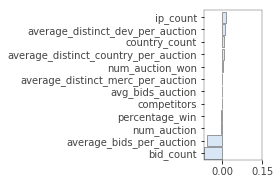

In [36]:
I = importances(clf, X, y)
plot_importances(I)
plt.savefig('merc_count_auction.png') 

# Naive Bayes

__Naive Bayes with SMOTE__

In [37]:
model = GaussianNB()
model.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = model.predict(SMOTE_X_test)


print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.5689095437220135


__Naive Bayes with ADASYN__

In [38]:
model = GaussianNB()
model.fit(ADASYN_X_train, ADASYN_y_train)

y_pred = model.predict(ADASYN_X_test)


print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.6505782119694129


## SVM

__SVM with SMOTE__

In [40]:
model = SVC(kernel="linear", C=0.025)
# model = svm.svc(kernel='linear', c=1, gamma=1) 
model.fit(SMOTE_X_train,SMOTE_y_train)
y_pred = model.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.7944076960162201


__Naive Bayes with ADASYN__

In [320]:
model = SVC(kernel="linear", C=0.025)
# model = svm.svc(kernel='linear', c=1, gamma=1) 
model.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = model.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.7513873161296856
